In [76]:
#TensorFlow 
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# NumPy y Matplotlib 
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# datos 
monto_invertido = np.array([70, 85, 96, 45, 50, 35],  dtype = float)
suscriptores_ganados = np.array([177, 209, 234, 84, 158, 92],  dtype = float)

# Imprimimos los datos en texto para verificar 
for i,c in enumerate(monto_invertido):
  print("{} Monto Invertido = {} Suscripores Ganados".format(c, suscriptores_ganados[i]))

70.0 Monto Invertido = 177.0 Suscripores Ganados
85.0 Monto Invertido = 209.0 Suscripores Ganados
96.0 Monto Invertido = 234.0 Suscripores Ganados
45.0 Monto Invertido = 84.0 Suscripores Ganados
50.0 Monto Invertido = 158.0 Suscripores Ganados
35.0 Monto Invertido = 92.0 Suscripores Ganados


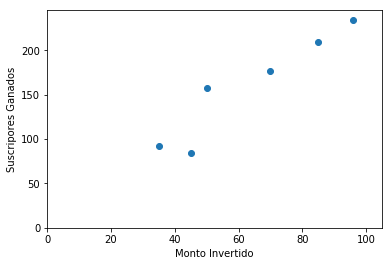

In [78]:
# Creamos un gráfico con los datos del cliente 
plt.scatter(monto_invertido, suscriptores_ganados)
plt.xlim(0,105)
plt.ylim(0,245)
plt.xlabel('Monto Invertido')
plt.ylabel('Suscripores Ganados')
plt.show()

In [79]:
# Separamos los datos, en datos de entrenamiento y de prueba 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(monto_invertido, suscriptores_ganados, random_state = 42, 
                                                    train_size=0.8, test_size=0.2)

In [80]:
# Definimos la capa o layer_a 
capa_a = tf.keras.layers.Dense(units=1, input_shape=[1])

In [81]:
# Modelo con la capa layer_a 
modelo = tf.keras.Sequential([capa_a])

In [82]:
# Ejemplo de capas definidas dentro de la definición del modelo 
modelo = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [83]:
# Compilamos el modelo 
modelo.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [84]:
# Entrenamos el modelo 
entrenar_modelo = modelo.fit(X_train, y_train, epochs = 1000, verbose = False)
print("Entrenamiento Terminado.")

Entrenamiento Terminado.


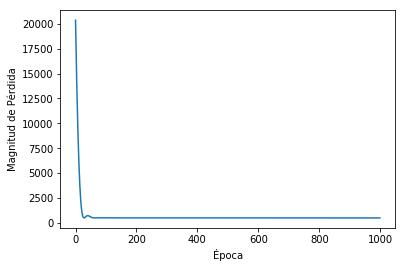

In [85]:
# Creamos un gráfico para mostrar estadísticas del entrenamiento 
import matplotlib.pyplot as plt
plt.xlabel('Época')
plt.ylabel("Magnitud de Pérdida")
plt.plot(entrenar_modelo.history['loss'])

In [86]:
# Predicción usando el modelo 
print(modelo.predict([85.0]))

[[210.85681]]


In [87]:
# Predicción de los puntos de datos de prueba 
y_pred = modelo.predict(X_test)
print('Valores Pedecidos')
print(y_test,'   ', y_pred.reshape(1,-1))

Valores Pedecidos
[177. 209.]     [[174.49239 210.85681]]


In [88]:
# Verificamos la precisión del modelo 
from sklearn.metrics import r2_score

r2_score(y_test, y_pred) 

0.9809846138919056

In [89]:
print('Proyecto Terminado !')

Proyecto Terminado !
